In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
# Función para aplicar erosión manualmente
def erosion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convertimos la imagen a binaria si está en 0-255 (para que sea binaria en 0-1)
    if np.max(image) == 255:
        image = image // 255  # Convertir la imagen a valores binarios 0 o 1

    # Aplicamos padding a la imagen original
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)

    # Aplicar erosión recorriendo la imagen
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            
            # Comprobamos si todos los píxeles donde hay 1s en el struct_elem son 1 en la imagen binaria
            if np.all(region[struct_elem == 1] == 1):  
                eroded_image[i, j] = 1  # Mantiene el píxel solo si encaja con el structuring element

    return eroded_image

# Función para aplicar dilatación manualmente
def dilatacion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convertimos la imagen a binaria si está en 0-255 (para que sea binaria en 0-1)
    if np.max(image) == 255:
        image = image // 255  # Convertir la imagen a valores binarios 0 o 1

    # Imagen con padding
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    # Aplicar dilatación
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            # Si al menos un píxel de la región es 1 en el structuring element
            if np.any(region[struct_elem == 1] == 1):  
                dilated_image[i, j] = 1

    return dilated_image

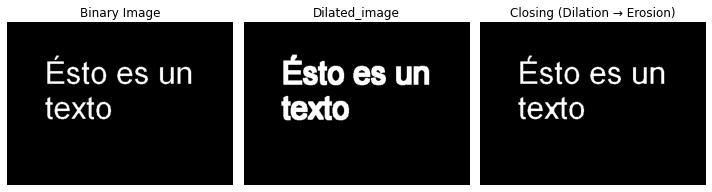

In [6]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply dilation
dilated_image = dilatacion_manual(binary, kernel)

# Apply erosion
eroded_image = erosion_manual(dilated_image, kernel)

# Display the original and processed images
titles = ["Binary Image", "Dilated_image","Closing (Dilation → Erosion)"]
images = [binary, dilated_image, eroded_image]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()